<a href="https://colab.research.google.com/github/vn322/Sport-University/blob/main/Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/mohammadkaiftahir/olympics-dataset

In [ ]:
!pip install fitter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 29.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


# Исследовательский анализ

1.   Новый пункт
2.   Новый пункт



In [ ]:
import pandas as pd
import numpy as np

from scipy import stats as stats
# Библиотека для визуализации 2D данных, а также 3D графики.
import matplotlib.pyplot as plt
# Более высокоуровневое API на базе библиотеки matplotlib.
import seaborn as sns

In [ ]:
url='https://drive.google.com/file/d/1-wDeDx1wLLrnUtE0YWWnxQQCj3e4IhCK/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_olymp_all = pd.read_csv(url)

In [ ]:
#df_olymp_all = pd.read_csv('https://drive.google.com/file/d/1-wDeDx1wLLrnUtE0YWWnxQQCj3e4IhCK/view?usp=sharing')
df_olymp_all.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
df_olymp_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
df_olymp_fill=df_olymp_all[['ID', 'Age', 'Height', 'Weight','Year','Medal']].groupby('Year').agg('count')
df_olymp_fill.T

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
ID,380,1936,1301,1733,3101,4040,4292,5693,5574,3321,...,3605,13821,4109,13443,4382,13602,4402,12920,4891,13688
Age,217,1146,1027,990,2452,3884,3447,4551,4611,2991,...,3603,13820,4109,13443,4382,13600,4402,12920,4891,13688
Height,46,116,213,257,475,721,767,974,975,1213,...,3521,13698,4080,13407,4376,13451,4400,12752,4871,13512
Weight,49,79,147,205,483,596,471,690,718,550,...,3519,13695,4062,13406,4366,13443,4378,12560,4673,13465
Medal,143,604,486,458,831,941,1308,962,823,739,...,440,2004,478,2001,526,2048,520,1941,597,2023


In [ ]:
df_olymp_fill['Height%']= round((df_olymp_fill['Height']/df_olymp_fill['ID'])*100, 1)
df_olymp_fill['Weight%']= round((df_olymp_fill['Weight']/df_olymp_fill['ID'])*100, 1)
df_olymp_fill['Medal%']= round((df_olymp_fill['Medal']/df_olymp_fill['ID'])*100, 1)
df_olymp_fill.T

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
ID,380.0,1936.0,1301.0,1733.0,3101.0,4040.0,4292.0,5693.0,5574.0,3321.0,...,3605.0,13821.0,4109.0,13443.0,4382.0,13602.0,4402.0,12920.0,4891.0,13688.0
Age,217.0,1146.0,1027.0,990.0,2452.0,3884.0,3447.0,4551.0,4611.0,2991.0,...,3603.0,13820.0,4109.0,13443.0,4382.0,13600.0,4402.0,12920.0,4891.0,13688.0
Height,46.0,116.0,213.0,257.0,475.0,721.0,767.0,974.0,975.0,1213.0,...,3521.0,13698.0,4080.0,13407.0,4376.0,13451.0,4400.0,12752.0,4871.0,13512.0
Weight,49.0,79.0,147.0,205.0,483.0,596.0,471.0,690.0,718.0,550.0,...,3519.0,13695.0,4062.0,13406.0,4366.0,13443.0,4378.0,12560.0,4673.0,13465.0
Medal,143.0,604.0,486.0,458.0,831.0,941.0,1308.0,962.0,823.0,739.0,...,440.0,2004.0,478.0,2001.0,526.0,2048.0,520.0,1941.0,597.0,2023.0
Height%,12.1,6.0,16.4,14.8,15.3,17.8,17.9,17.1,17.5,36.5,...,97.7,99.1,99.3,99.7,99.9,98.9,100.0,98.7,99.6,98.7
Weight%,12.9,4.1,11.3,11.8,15.6,14.8,11.0,12.1,12.9,16.6,...,97.6,99.1,98.9,99.7,99.6,98.8,99.5,97.2,95.5,98.4
Medal%,37.6,31.2,37.4,26.4,26.8,23.3,30.5,16.9,14.8,22.3,...,12.2,14.5,11.6,14.9,12.0,15.1,11.8,15.0,12.2,14.8


In [ ]:
df_olymp_fill

,ID,Age,Height,Weight,Medal,Height%,Weight%,Medal%
Year,,,,,,,,
1896,380,217,46,49,143,12.1,12.9,37.6
1900,1936,1146,116,79,604,6.0,4.1,31.2
1904,1301,1027,213,147,486,16.4,11.3,37.4
1906,1733,990,257,205,458,14.8,11.8,26.4
1908,3101,2452,475,483,831,15.3,15.6,26.8
1912,4040,3884,721,596,941,17.8,14.8,23.3
1920,4292,3447,767,471,1308,17.9,11.0,30.5
1924,5693,4551,974,690,962,17.1,12.1,16.9
1928,5574,4611,975,718,823,17.5,12.9,14.8


array([[<Axes: title={'center': 'Height%'}>,
        <Axes: title={'center': 'Weight%'}>]], dtype=object)

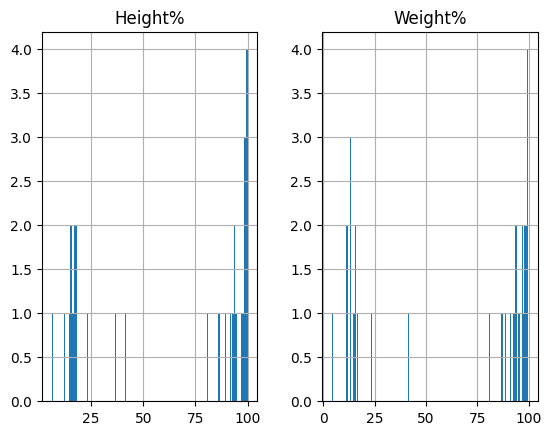

In [ ]:
df_olymp_fill[['Height%','Weight%']].hist(bins=155)

In [ ]:
df_olymp_fill=df_olymp_fill.reset_index()

<Axes: xlabel='Year', ylabel='Height%'>

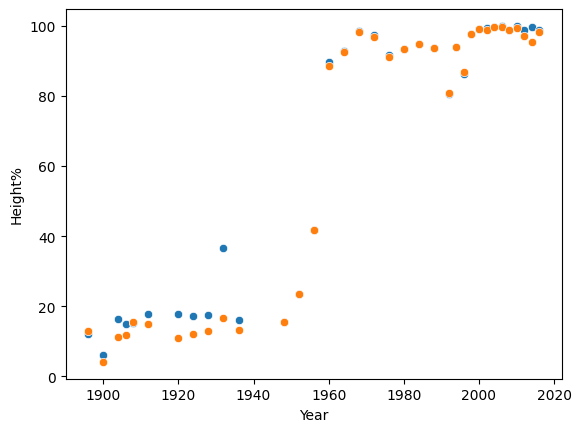

In [ ]:
sns.scatterplot(data=df_olymp_fill, x="Year", y="Height%", legend = 'full')
sns.scatterplot(data=df_olymp_fill, x="Year", y="Weight%", legend = 'full')

[Text(0, 0, '1896'),
 Text(1, 0, '1900'),
 Text(2, 0, '1904'),
 Text(3, 0, '1906'),
 Text(4, 0, '1908'),
 Text(5, 0, '1912'),
 Text(6, 0, '1920'),
 Text(7, 0, '1924'),
 Text(8, 0, '1928'),
 Text(9, 0, '1932'),
 Text(10, 0, '1936'),
 Text(11, 0, '1948'),
 Text(12, 0, '1952'),
 Text(13, 0, '1956'),
 Text(14, 0, '1960'),
 Text(15, 0, '1964'),
 Text(16, 0, '1968'),
 Text(17, 0, '1972'),
 Text(18, 0, '1976'),
 Text(19, 0, '1980'),
 Text(20, 0, '1984'),
 Text(21, 0, '1988'),
 Text(22, 0, '1992'),
 Text(23, 0, '1994'),
 Text(24, 0, '1996'),
 Text(25, 0, '1998'),
 Text(26, 0, '2000'),
 Text(27, 0, '2002'),
 Text(28, 0, '2004'),
 Text(29, 0, '2006'),
 Text(30, 0, '2008'),
 Text(31, 0, '2010'),
 Text(32, 0, '2012'),
 Text(33, 0, '2014'),
 Text(34, 0, '2016')]

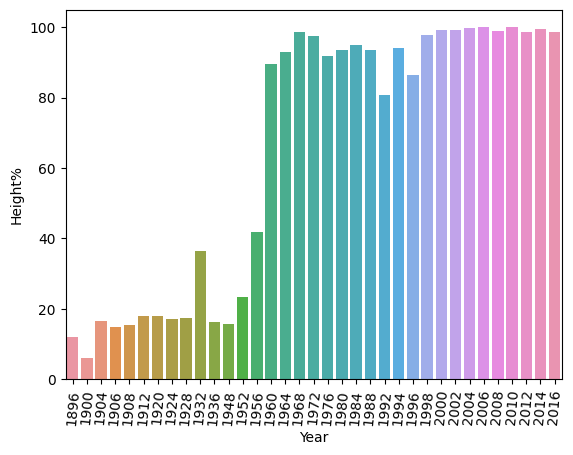

In [ ]:
chart=sns.barplot(data=df_olymp_fill, x="Year", y="Height%")
chart.set_xticklabels(chart.get_xticklabels(), rotation=85)

[Text(0, 0, '1896'),
 Text(1, 0, '1900'),
 Text(2, 0, '1904'),
 Text(3, 0, '1906'),
 Text(4, 0, '1908'),
 Text(5, 0, '1912'),
 Text(6, 0, '1920'),
 Text(7, 0, '1924'),
 Text(8, 0, '1928'),
 Text(9, 0, '1932'),
 Text(10, 0, '1936'),
 Text(11, 0, '1948'),
 Text(12, 0, '1952'),
 Text(13, 0, '1956'),
 Text(14, 0, '1960'),
 Text(15, 0, '1964'),
 Text(16, 0, '1968'),
 Text(17, 0, '1972'),
 Text(18, 0, '1976'),
 Text(19, 0, '1980'),
 Text(20, 0, '1984'),
 Text(21, 0, '1988'),
 Text(22, 0, '1992'),
 Text(23, 0, '1994'),
 Text(24, 0, '1996'),
 Text(25, 0, '1998'),
 Text(26, 0, '2000'),
 Text(27, 0, '2002'),
 Text(28, 0, '2004'),
 Text(29, 0, '2006'),
 Text(30, 0, '2008'),
 Text(31, 0, '2010'),
 Text(32, 0, '2012'),
 Text(33, 0, '2014'),
 Text(34, 0, '2016')]

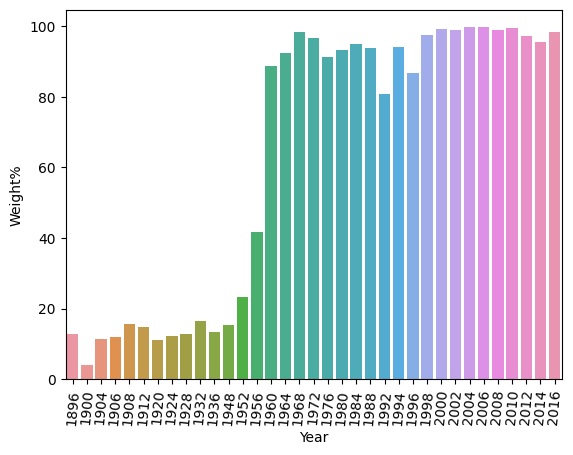

In [ ]:
chart=sns.barplot(data=df_olymp_fill, x="Year", y="Weight%")
chart.set_xticklabels(chart.get_xticklabels(), rotation=85)

<Axes: xlabel='Year', ylabel='Height%'>

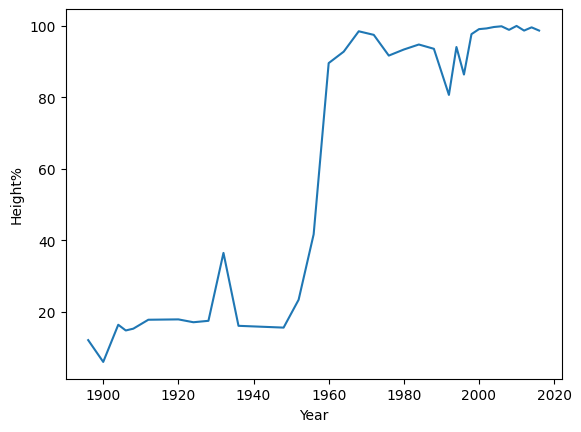

In [ ]:
sns.lineplot(data=df_olymp_fill, x="Year", y="Height%")

<ipython-input-14-529b25843766>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_olymp_fill['Height%'], rug=True,  color='red', bins =55);


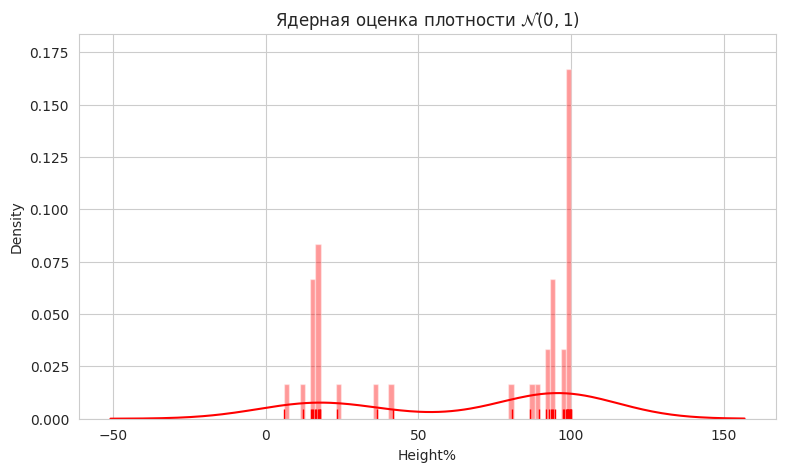

In [ ]:
with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'):

    plt.figure(figsize=(9, 5))
    plt.title(r"Ядерная оценка плотности $\mathcal{N}(0, 1)$")
    sns.distplot(df_olymp_fill['Height%'], rug=True,  color='red', bins =55);

In [ ]:
df_olymp_all

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [ ]:
df_olymp_all['Name'].unique()

array(['A Dijiang', 'A Lamusi', 'Gunnar Nielsen Aaby', ..., 'Andrzej ya',
       'Piotr ya', 'Tomasz Ireneusz ya'], dtype=object)

In [ ]:
df_olymp_all['Name'].nunique()

134732

In [ ]:
df_olymp_all['ID'].nunique()

135571

In [ ]:
df_olymp_all[df_olymp_all['ID']==5]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [ ]:
coun_id = df_olymp_all.groupby('ID').count()
coun_id[['Name', 'Medal']]

,Name,Medal
ID,,
1,1,0
2,1,0
3,1,0
4,1,1
5,6,0
...,...,...
135567,2,0
135568,1,0
135569,1,0


array([[<Axes: title={'center': 'Name'}>]], dtype=object)

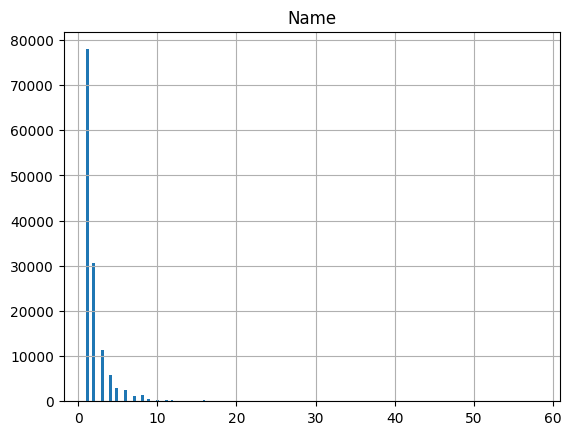

In [ ]:
coun_id[['Name']].hist(bins=155)

In [ ]:
coun_id[['Name', 'Medal']].describe()

,Name,Medal
count,135571.000000,135571.000000
mean,1.999808,0.293448
std,1.990221,0.721409
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,2.000000,0.000000
max,58.000000,28.000000


In [ ]:
coun_id[coun_id['Name']==58]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
77710,58,58,58,0,0,58,58,58,58,58,58,58,58,1


In [ ]:
df_olymp_all[df_olymp_all['ID']==77710]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
154798,77710,Robert Tait McKenzie,M,44.0,NaN,NaN,Canada,CAN,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Sculpturing,NaN
154799,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154800,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154801,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154802,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154803,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154804,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154805,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154806,77710,Robert Tait McKenzie,M,65.0,NaN,NaN,Canada,CAN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Medals And...",Bronze
154807,77710,Robert Tait McKenzie,M,65.0,NaN,NaN,Canada,CAN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN


In [ ]:
coun_id[coun_id['Medal']==28]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
94406,30,30,30,30,30,30,30,30,30,30,30,30,30,28


In [ ]:
df_olymp_all[df_olymp_all['ID']==94406]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
187887,94406,"Michael Fred Phelps, II",M,15.0,193.0,91.0,United States,USA,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 200 metres Butterfly,NaN
187888,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Freestyle,Bronze
187889,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
187890,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Gold
187891,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 100 metres Butterfly,Gold
187892,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Butterfly,Gold
187893,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Individual Medley,Gold
187894,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 400 metres Individual Medley,Gold
187895,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Gold
187896,94406,"Michael Fred Phelps, II",M,23.0,193.0,91.0,United States,USA,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Men's 200 metres Freestyle,Gold


In [ ]:
df_olymp_all.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [ ]:
df_olymp_all.describe(include=[object])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


# olymp_weight

<Axes: ylabel='Frequency'>

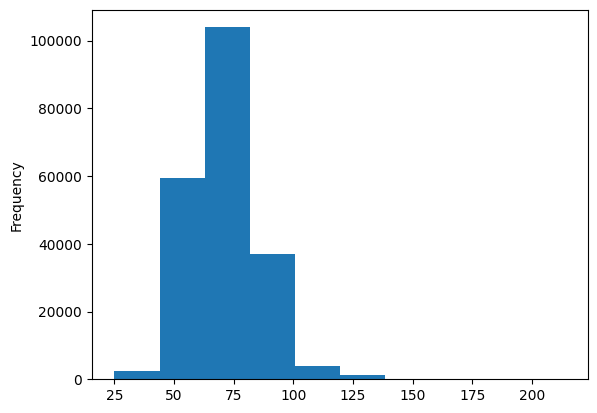

In [ ]:
weight_ol_all=df_olymp_all['Weight'].dropna()
weight_ol_all.plot(kind='hist')

In [ ]:
weight_ol_all.nunique()

220

In [ ]:
np.sort(weight_ol_all.unique())

array([ 25.        ,  28.        ,  30.        ,  31.        ,
        32.        ,  33.        ,  34.        ,  35.        ,
        36.        ,  37.        ,  38.        ,  39.        ,
        40.        ,  41.        ,  42.        ,  43.        ,
        44.        ,  45.        ,  46.        ,  47.        ,
        48.        ,  48.5       ,  49.        ,  49.5       ,
        50.        ,  51.        ,  51.5       ,  52.        ,
        52.5       ,  53.        ,  53.5       ,  54.        ,
        54.5       ,  55.        ,  55.5       ,  56.        ,
        56.5       ,  57.        ,  57.5       ,  58.        ,
        58.5       ,  59.        ,  59.5       ,  60.        ,
        60.5       ,  61.        ,  61.5       ,  62.        ,
        62.5       ,  63.        ,  63.5       ,  64.        ,
        64.5       ,  65.        ,  65.5       ,  66.        ,
        66.5       ,  67.        ,  67.5       ,  68.        ,
        68.5       ,  69.        ,  69.5       ,  70.  

In [ ]:
# методы pandas по-умолчанию просто не берут в расчет пропуски
print(weight_ol_all.mean())
print(weight_ol_all.median())
print(weight_ol_all.mode()[0])

print(weight_ol_all.std())
print(weight_ol_all.var())

70.70239290053351
70.0
70.0
14.348019999019396
205.86567789226055


Среднее по всей выборке:  70.70239290053351


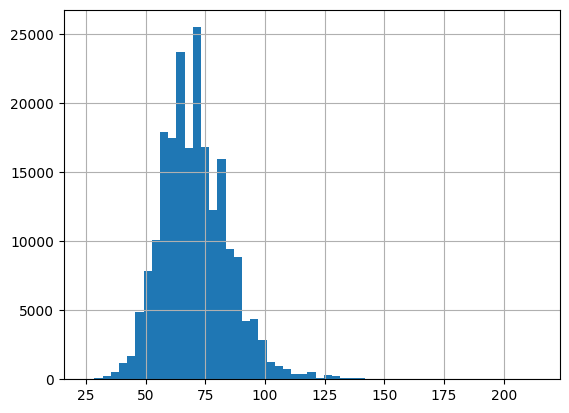

In [ ]:
weight_ol_all.hist(bins=55)
print('Среднее по всей выборке: ',weight_ol_all.mean())

<Axes: xlabel='Weight', ylabel='Count'>

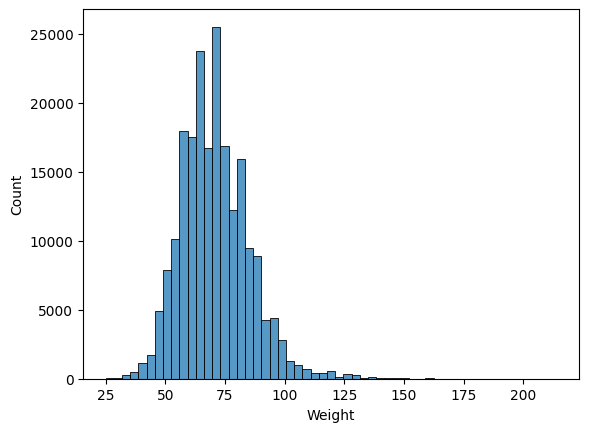

In [ ]:
sns.histplot(x=weight_ol_all,  bins=55)

<Axes: xlabel='Weight', ylabel='Count'>

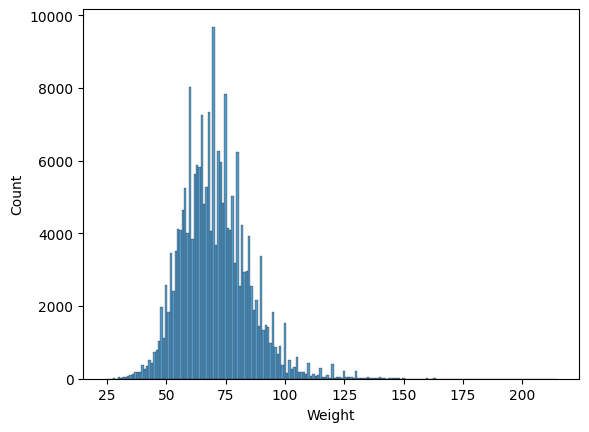

In [ ]:
sns.histplot(x=weight_ol_all, discrete=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a3ab141f5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3ab141fa00>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7a3ab141f250>],
 'medians': [<matplotlib.lines.Line2D at 0x7a3ab141ff70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3ab1450250>],
 'means': []}

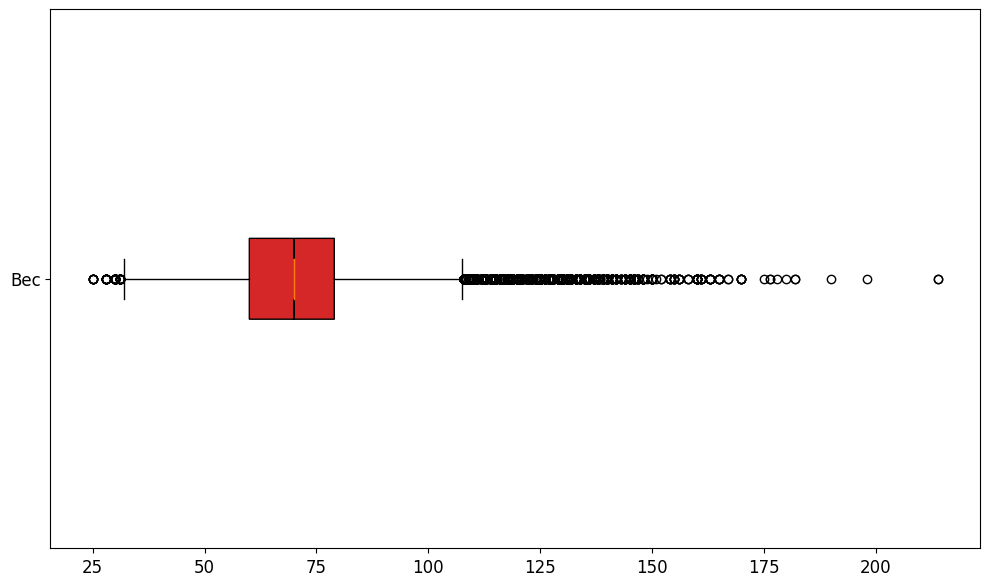

In [ ]:
'''
диаграмма boxplot: медиана, Q1 и Q3
'''
plt.figure(figsize=(12,7))
plt.rcParams.update({'font.size': 12})

plt.boxplot(weight_ol_all, showfliers=1,notch='True',patch_artist=True,
            vert = 0, boxprops=dict(facecolor="C3"),labels=['Вес'])


In [ ]:
weight_ol_all.describe()

count    208241.000000
mean         70.702393
std          14.348020
min          25.000000
25%          60.000000
50%          70.000000
75%          79.000000
max         214.000000
Name: Weight, dtype: float64

In [ ]:
weight_ol_all.quantile([0.25, 0.75])

0.25    60.0
0.75    79.0
Name: Weight, dtype: float64

<Axes: >

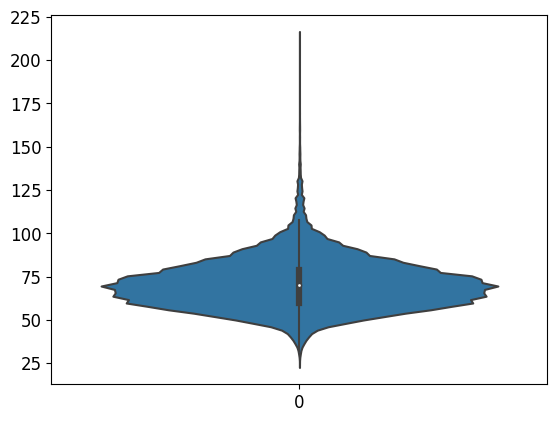

In [ ]:
sns.violinplot(weight_ol_all,showmeans=False, showmedians=True)

In [ ]:
def ejection(df, param):
    q1 = df[param].quantile(0.25)
    q3 = df[param].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    remove_outliers = df[df[param].between(lower_bound, upper_bound, inclusive=True)]
    df_result = pd.concat([df, remove_outliers]).drop_duplicates(keep=False)[[param]]
    df_result = df_result.dropna()
    return df_result[param].tolist()

In [ ]:
np.sort(ejection(df_olymp_all, 'Weight'))

<ipython-input-41-b8028f2660bb>:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  remove_outliers = df[df[param].between(lower_bound, upper_bound, inclusive=True)]


array([ 25.,  25.,  25., ..., 198., 214., 214.])

In [ ]:
import scipy
# Shapiro-Wilk Test
stat, p = scipy.stats.shapiro(weight_ol_all) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=0.970, p-value=0.000
Отклонить гипотезу о нормальности, (отклонить H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# D'Agostino and Pearson's Test
stat, p = scipy.stats.normaltest(weight_ol_all) # Критерий согласия Пирсона, Тест д'Агостино на K ^ 2
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=27009.310, p-value=0.000
Отклонить гипотезу о нормальности, (отклонить H0)


In [ ]:
stat, p = stats.kstest(weight_ol_all, 'norm') # Критерий Колмогорова-Смирнова
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=1.000, p-value=0.000
Отклонить гипотезу о нормальности, (отклонить H0)


2024-01-12 07:20:00.947 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-01-12 07:20:03.553 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=0.007688)
2024-01-12 07:20:05.863 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted alpha distribution with error=0.000352)
2024-01-12 07:20:07.400 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted arcsine distribution with error=0.010384)
2024-01-12 07:20:15.141 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted argus distribution with error=0.008969)
2024-01-12 07:20:18.832 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=0.000362)
2024-01-12 07:20:20.838 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted bradford distribution with error=0.008102)
2024-01-12 07:20:26.355 | INFO     | fitter.fitter:_fit_single_distribution:337 - F

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
alpha,0.000352,1912.166018,1942.905372,inf,0.027012,1.959805e-132
f,0.000353,1997.038039,2038.023844,inf,0.028140,1.091873e-143
invgamma,0.000353,1979.011455,2009.750809,inf,0.026090,1.419494e-123
lognorm,0.000355,2029.380406,2060.119760,inf,0.025149,7.523571e-115
betaprime,0.000356,2055.056953,2096.042758,inf,0.024988,2.206514e-113


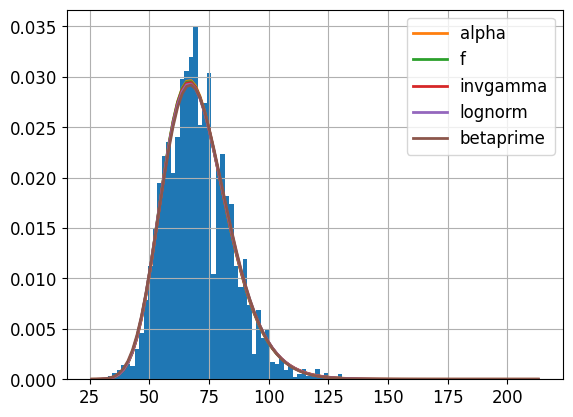

In [ ]:
from fitter import Fitter
f = Fitter(weight_ol_all)
f.fit()
f.summary()

In [ ]:
weight_ol_all_sample = weight_ol_all.sample(30)

In [ ]:
import scipy
# Shapiro-Wilk Test
stat, p = scipy.stats.shapiro(weight_ol_all_sample) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=0.970, p-value=0.531
Принять гипотезу о нормальности, (не отклонять H0)


In [ ]:
# D'Agostino and Pearson's Test
stat, p = scipy.stats.normaltest(weight_ol_all_sample) # Критерий согласия Пирсона, Тест д'Агостино на K ^ 2
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=1.545, p-value=0.462
Принять гипотезу о нормальности, (не отклонять H0)


2024-01-12 14:03:32.224 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-01-12 14:03:32.273 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=0.138291)
2024-01-12 14:03:32.405 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted arcsine distribution with error=0.145231)
2024-01-12 14:03:32.440 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted alpha distribution with error=0.138813)
2024-01-12 14:03:32.504 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted argus distribution with error=0.140132)
2024-01-12 14:03:32.695 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=0.13776)
2024-01-12 14:03:32.749 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted bradford distribution with error=0.138385)
2024-01-12 14:03:32.818 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fi

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
vonmises_line,0.137375,813.709931,817.913523,inf,0.121250,0.724870
dweibull,0.137747,862.070135,866.273727,inf,0.133920,0.607640
beta,0.137760,816.586055,822.190844,inf,0.133238,0.613950
triang,0.137806,837.452088,841.655681,inf,0.129523,0.648433
truncweibull_min,0.137943,818.157755,825.163742,inf,0.122371,0.714627


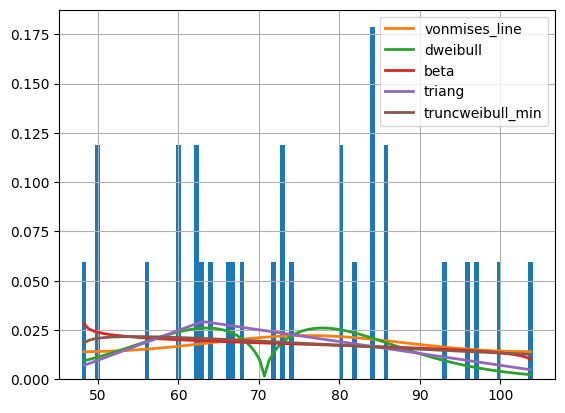

In [ ]:
from fitter import Fitter
f = Fitter(weight_ol_all_sample)
f.fit()
f.summary()

In [ ]:
shapiro = []
pears = []
shap_num =[]
pears_num = []
for _ in range(1000):
  stat1, p1 = scipy.stats.shapiro(weight_ol_all.sample(30)) # тест Шапиро-Уилк
  shapiro.append(p1)
  if p1<0.05:
    shap_num.append(1)
  else:
    shap_num.append(0)
  stat2, p2 = scipy.stats.normaltest(weight_ol_all.sample(30)) # Критерий согласия Пирсона
  pears.append(p2)
  if p2<0.05:
    pears_num.append(1)
  else:
    pears_num.append(0)
modell_weight_distr = pd.DataFrame({'Критерий шапиро': shapiro, 'Крит.Шапиро<0.05': shap_num, 'Критерий Пирсона': pears,'Крит.Пирсона<0.05': pears_num})
modell_weight_distr

,Критерий шапиро,Крит.Шапиро<0.05,Критерий Пирсона,Крит.Пирсона<0.05
0,4.092871e-01,0,0.366903,0
1,5.156773e-03,1,0.912901,0
2,2.443637e-01,0,0.384297,0
3,7.056316e-01,0,0.272619,0
4,4.652081e-01,0,0.433393,0
...,...,...,...,...
995,9.023494e-02,0,0.101644,0
996,1.304660e-01,0,0.976523,0
997,1.486579e-01,0,0.931444,0
998,1.948121e-02,1,0.284665,0


In [ ]:
modell_weight_distr.describe()

,Критерий шапиро,Крит.Шапиро<0.05,Критерий Пирсона,Крит.Пирсона<0.05
count,1.000000e+03,1000.000000,1.000000e+03,1000.00000
mean,3.469118e-01,0.236000,3.430522e-01,0.26400
std,3.111420e-01,0.424835,3.021143e-01,0.44102
min,3.529558e-08,0.000000,5.861750e-10,0.00000
25%,5.626399e-02,0.000000,3.758578e-02,0.00000
50%,2.593903e-01,0.000000,2.974780e-01,0.00000
75%,6.030790e-01,0.000000,5.868165e-01,1.00000
max,9.998605e-01,1.000000,9.864555e-01,1.00000


In [ ]:
modell_weight_distr.groupby('Крит.Шапиро<0.05').agg('count')

,Критерий шапиро,Критерий Пирсона,Крит.Пирсона<0.05
Крит.Шапиро<0.05,,,
0,764,764,764
1,236,236,236


In [ ]:
modell_weight_distr.groupby('Крит.Пирсона<0.05').agg('count')

,Критерий шапиро,Крит.Шапиро<0.05,Критерий Пирсона
Крит.Пирсона<0.05,,,
0,736,736,736
1,264,264,264


# olymp_height

<Axes: ylabel='Frequency'>

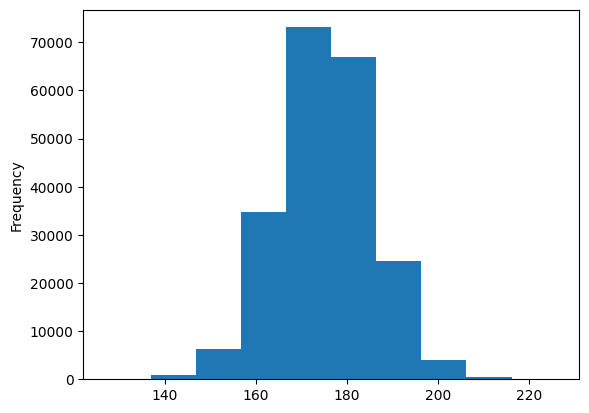

In [ ]:
height_ol_all=df_olymp_all['Height'].dropna()
height_ol_all.plot(kind='hist')

In [ ]:
height_ol_all.nunique()

95

In [ ]:
np.sort(height_ol_all.unique())

array([127., 128., 130., 131., 132., 133., 135., 136., 137., 138., 139.,
       140., 141., 142., 143., 144., 145., 146., 147., 148., 149., 150.,
       151., 152., 153., 154., 155., 156., 157., 158., 159., 160., 161.,
       162., 163., 164., 165., 166., 167., 168., 169., 170., 171., 172.,
       173., 174., 175., 176., 177., 178., 179., 180., 181., 182., 183.,
       184., 185., 186., 187., 188., 189., 190., 191., 192., 193., 194.,
       195., 196., 197., 198., 199., 200., 201., 202., 203., 204., 205.,
       206., 207., 208., 209., 210., 211., 212., 213., 214., 215., 216.,
       217., 218., 219., 220., 221., 223., 226.])

In [ ]:
# методы pandas по-умолчанию просто не берут в расчет пропуски
print(height_ol_all.mean())
print(height_ol_all.median())
print(height_ol_all.mode()[0])

print(height_ol_all.std())
print(height_ol_all.var())

175.33896987366376
175.0
180.0
10.518462222679224
110.63804752992996


Среднее по всей выборке:  70.70239290053351


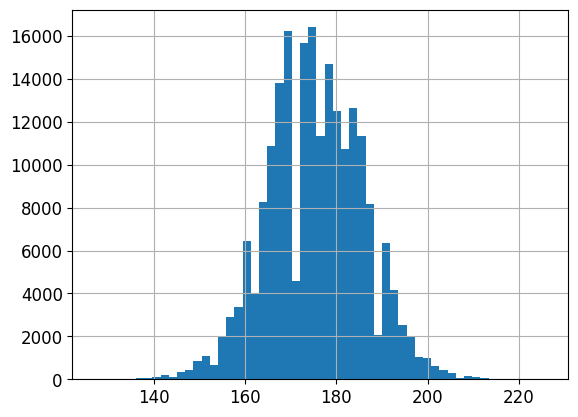

In [ ]:
height_ol_all.hist(bins=55)
print('Среднее по всей выборке: ',weight_ol_all.mean())

<Axes: xlabel='Height', ylabel='Count'>

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


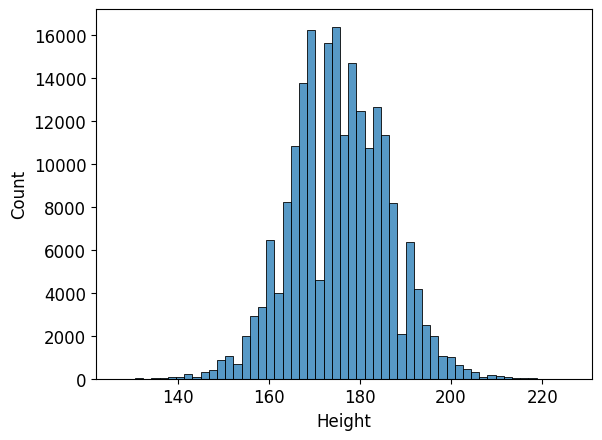

In [ ]:
sns.histplot(x=height_ol_all,  bins=55)

<Axes: xlabel='Height', ylabel='Count'>

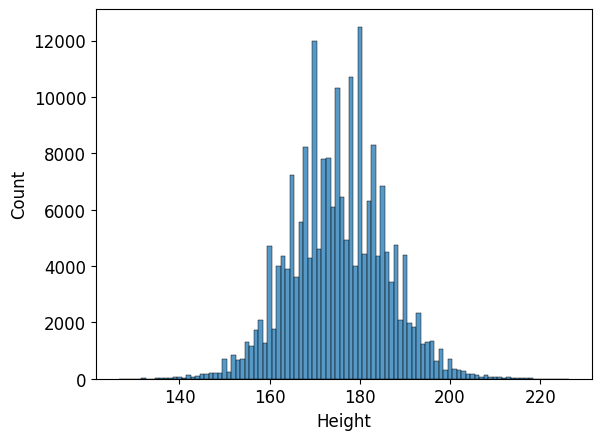

In [ ]:
sns.histplot(x=height_ol_all, discrete=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a3a9ad830d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3a9ad83610>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7a3a9ad82d40>],
 'medians': [<matplotlib.lines.Line2D at 0x7a3a9ad83b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3a9ad83e20>],
 'means': []}

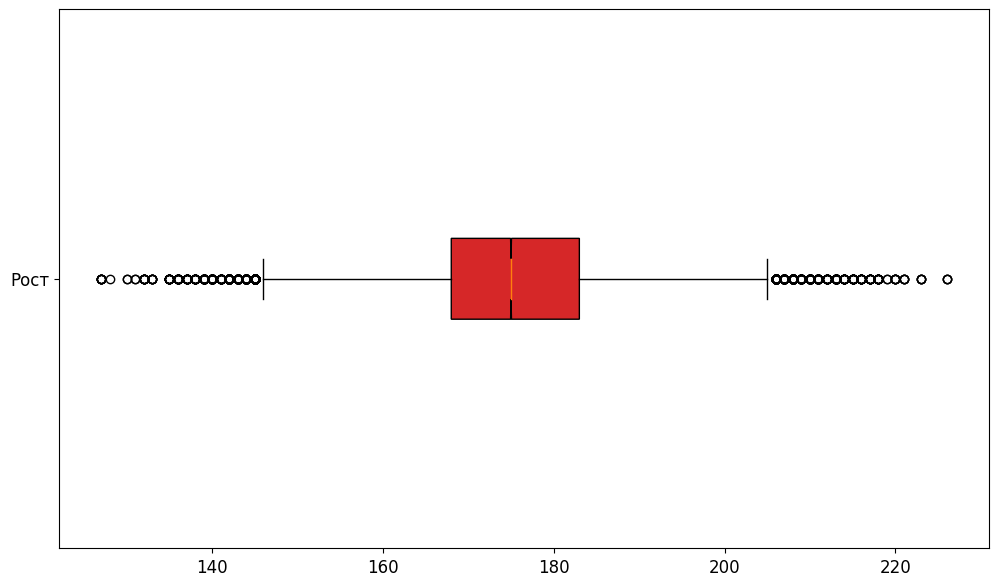

In [ ]:
'''
диаграмма boxplot: медиана, Q1 и Q3
'''
plt.figure(figsize=(12,7))
plt.rcParams.update({'font.size': 12})

plt.boxplot(height_ol_all, showfliers=1,notch='True',patch_artist=True,
            vert = 0, boxprops=dict(facecolor="C3"),labels=['Рост'])
#plt.boxplot(weight_ol_all, showfliers=1,notch='True',patch_artist=True, vert = 0, boxprops=dict(facecolor="C1"),labels=['Вес'])


In [ ]:
height_ol_all.describe()

count    210945.000000
mean        175.338970
std          10.518462
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: Height, dtype: float64

In [ ]:
height_ol_all.quantile([0.25, 0.75])

0.25    168.0
0.75    183.0
Name: Height, dtype: float64

<Axes: >

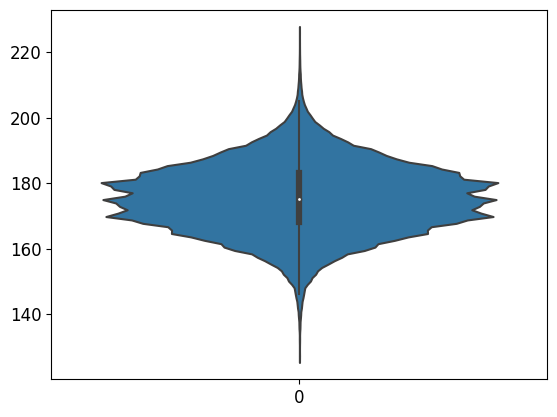

In [ ]:
sns.violinplot(height_ol_all,showmeans=False, showmedians=True)

In [ ]:
def ejection(df, param):
    q1 = df[param].quantile(0.25)
    q3 = df[param].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    remove_outliers = df[df[param].between(lower_bound, upper_bound, inclusive=True)]
    df_result = pd.concat([df, remove_outliers]).drop_duplicates(keep=False)[[param]]
    df_result = df_result.dropna()
    return df_result[param].tolist()

In [ ]:
np.sort(ejection(df_olymp_all, 'Height'))

<ipython-input-61-b8028f2660bb>:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  remove_outliers = df[df[param].between(lower_bound, upper_bound, inclusive=True)]


array([127., 127., 127., ..., 226., 226., 226.])

In [ ]:
import scipy
# Shapiro-Wilk Test
stat, p = scipy.stats.shapiro(height_ol_all) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=0.998, p-value=0.000
Отклонить гипотезу о нормальности, (отклонить H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# D'Agostino and Pearson's Test
stat, p = scipy.stats.normaltest(height_ol_all) # Критерий согласия Пирсона, Тест д'Агостино на K ^ 2
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=246.893, p-value=0.000
Отклонить гипотезу о нормальности, (отклонить H0)


In [ ]:
stat, p = stats.kstest(height_ol_all, 'norm') # Критерий Колмогорова-Смирнова
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=1.000, p-value=0.000
Отклонить гипотезу о нормальности, (отклонить H0)


2024-01-12 07:40:43.999 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-01-12 07:41:06.678 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=0.013147)
2024-01-12 07:41:14.041 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED alpha distribution (taking more than 30 seconds)
2024-01-12 07:41:36.856 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED arcsine distribution (taking more than 30 seconds)
2024-01-12 07:41:44.121 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED argus distribution (taking more than 30 seconds)
2024-01-12 07:42:06.985 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-01-12 07:42:14.230 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED betaprime distribution (taking more than 30 seconds)
2024-01-12 07:42:37.060 | WARNIN

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.003415,1398.862722,1429.640780,inf,0.034494,1.680390e-218
norm,0.003415,1397.779716,1418.298421,inf,0.034353,1.017618e-216
gennorm,0.003424,1385.325533,1416.103591,inf,0.035912,8.503765e-237
logistic,0.003634,1227.705647,1248.224352,inf,0.048541,0.000000e+00
dweibull,0.003645,1284.200814,1314.978873,inf,0.044829,0.000000e+00


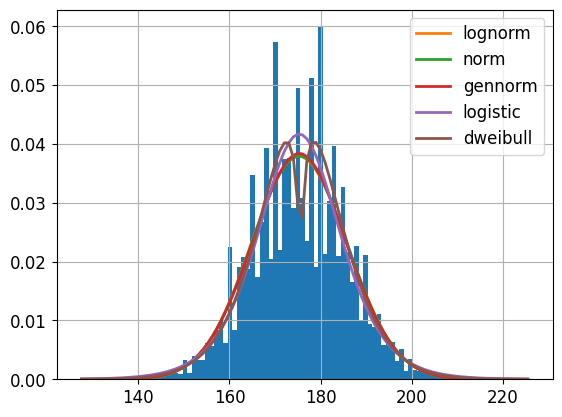

In [ ]:
from fitter import Fitter
f = Fitter(height_ol_all)
f.fit()
f.summary()

In [ ]:
height_ol_all_sample = height_ol_all.sample(30)

In [ ]:
import scipy
# Shapiro-Wilk Test
stat, p = scipy.stats.shapiro(height_ol_all_sample) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=0.980, p-value=0.829
Принять гипотезу о нормальности, (не отклонять H0)


In [ ]:
# D'Agostino and Pearson's Test
stat, p = scipy.stats.normaltest(height_ol_all_sample) # Критерий согласия Пирсона, Тест д'Агостино на K ^ 2
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=0.262, p-value=0.877
Принять гипотезу о нормальности, (не отклонять H0)


2024-01-12 08:05:47.626 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-01-12 08:05:48.797 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=0.12239)
2024-01-12 08:05:51.890 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted alpha distribution with error=0.119002)
2024-01-12 08:05:52.143 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted arcsine distribution with error=0.132211)
2024-01-12 08:05:55.315 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted argus distribution with error=0.125079)
2024-01-12 08:05:57.294 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=0.119444)
2024-01-12 08:06:00.383 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted bradford distribution with error=0.128574)
2024-01-12 08:06:02.276 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fi

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
loglaplace,0.117393,884.452194,888.655787,inf,0.112577,8.013240e-01
laplace,0.117494,880.942006,883.744401,inf,0.114782,7.824885e-01
laplace_asymmetric,0.117565,888.166219,892.369811,inf,0.085627,9.669481e-01
genhyperbolic,0.118119,879.699570,886.705557,inf,0.566667,1.255522e-09
skewcauchy,0.118484,926.448751,930.652343,inf,0.110181,8.211846e-01


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


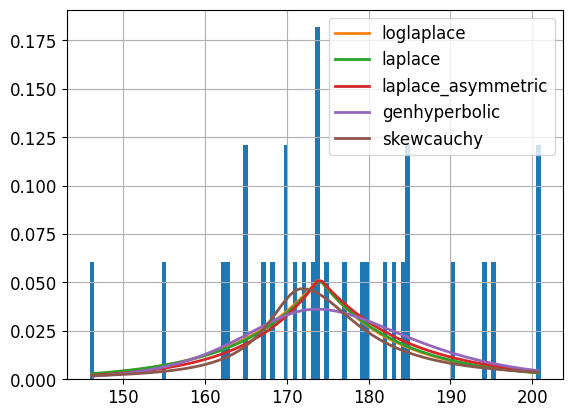

In [ ]:
from fitter import Fitter
f = Fitter(height_ol_all_sample)
f.fit()
f.summary()

In [ ]:
df_olymp_all['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [ ]:
shapiro = []
pears = []
shap_num =[]
pears_num = []
for _ in range(1000):
  stat1, p1 = scipy.stats.shapiro(height_ol_all.sample(30)) # тест Шапиро-Уилк
  shapiro.append(p1)
  if p1<0.05:
    shap_num.append(1)
  else:
    shap_num.append(0)
  stat2, p2 = scipy.stats.normaltest(height_ol_all.sample(30)) # Критерий согласия Пирсона
  pears.append(p2)
  if p2<0.05:
    pears_num.append(1)
  else:
    pears_num.append(0)
modell_height_distr = pd.DataFrame({'Критерий шапиро': shapiro, 'Крит.Шапиро<0.05': shap_num, 'Критерий Пирсона': pears,'Крит.Пирсона<0.05': pears_num})
modell_height_distr

,Критерий шапиро,Крит.Шапиро<0.05,Критерий Пирсона,Крит.Пирсона<0.05
0,0.924510,0,0.645981,0
1,0.181018,0,0.706226,0
2,0.975051,0,0.310584,0
3,0.048670,1,0.739683,0
4,0.841320,0,0.432733,0
...,...,...,...,...
995,0.309159,0,0.184184,0
996,0.403821,0,0.959442,0
997,0.128683,0,0.739900,0
998,0.116769,0,0.826893,0


In [ ]:
modell_height_distr.describe()

,Критерий шапиро,Крит.Шапиро<0.05,Критерий Пирсона,Крит.Пирсона<0.05
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.461095,0.075000,0.474614,0.079000
std,0.293446,0.263523,0.287716,0.269874
min,0.000058,0.000000,0.000024,0.000000
25%,0.197665,0.000000,0.236440,0.000000
50%,0.442038,0.000000,0.476821,0.000000
75%,0.721700,0.000000,0.708233,0.000000
max,0.998899,1.000000,0.999247,1.000000


In [ ]:
modell_height_distr.groupby('Крит.Шапиро<0.05').agg('count')

,Критерий шапиро,Критерий Пирсона,Крит.Пирсона<0.05
Крит.Шапиро<0.05,,,
0,925,925,925
1,75,75,75


In [ ]:
modell_height_distr.groupby('Крит.Пирсона<0.05').agg('count')

,Критерий шапиро,Крит.Шапиро<0.05,Критерий Пирсона
Крит.Пирсона<0.05,,,
0,921,921,921
1,79,79,79


In [ ]:
df_rugby=df_olymp_all[df_olymp_all['Sport']=='Rugby']
df_judo=df_olymp_all[df_olymp_all['Sport']=='Judo']
df_wrest=df_olymp_all[df_olymp_all['Sport']=='Wrestling']

In [ ]:
df_rugby=df_rugby['Height'].dropna()
df_judo=df_judo['Height'].dropna()
df_wrest=df_wrest['Height'].dropna()

In [ ]:
df_rugby.describe()

count     62.000000
mean     176.096774
std        6.771952
min      164.000000
25%      172.000000
50%      175.000000
75%      180.000000
max      191.000000
Name: Height, dtype: float64

In [ ]:
df_rugby.describe(include=[object])

count     62.000000
mean     176.096774
std        6.771952
min      164.000000
25%      172.000000
50%      175.000000
75%      180.000000
max      191.000000
Name: Height, dtype: float64

<Axes: >

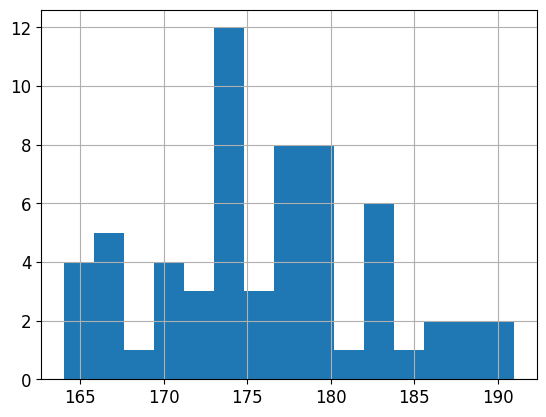

In [ ]:
df_rugby.hist(bins=15)

In [ ]:
import scipy
# Shapiro-Wilk Test
stat, p = scipy.stats.shapiro(df_rugby) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=0.970, p-value=0.133
Принять гипотезу о нормальности, (не отклонять H0)


In [ ]:
# D'Agostino and Pearson's Test
stat, p = scipy.stats.normaltest(df_rugby) # Критерий согласия Пирсона, Тест д'Агостино на K ^ 2
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=1.605, p-value=0.448
Принять гипотезу о нормальности, (не отклонять H0)


2024-01-12 08:13:40.408 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-01-12 08:13:41.936 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=1.007785)
2024-01-12 08:13:44.093 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted alpha distribution with error=1.005424)
2024-01-12 08:13:45.116 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted arcsine distribution with error=1.069049)
2024-01-12 08:13:46.665 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted argus distribution with error=1.024365)
2024-01-12 08:13:48.725 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=1.007166)
2024-01-12 08:13:51.395 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted bradford distribution with error=1.017196)
2024-01-12 08:13:54.586 | INFO     | fitter.fitter:_fit_single_distribution:337 - F

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
dgamma,0.987202,729.254733,735.636136,inf,0.090121,0.661636
dweibull,0.991645,713.142058,719.523461,inf,0.089954,0.663865
laplace_asymmetric,0.997851,733.451189,739.832592,inf,0.140517,0.156967
rel_breitwigner,1.004499,705.877207,712.258610,inf,0.119985,0.308816
truncnorm,1.004649,689.850036,698.358574,inf,0.145873,0.129195


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


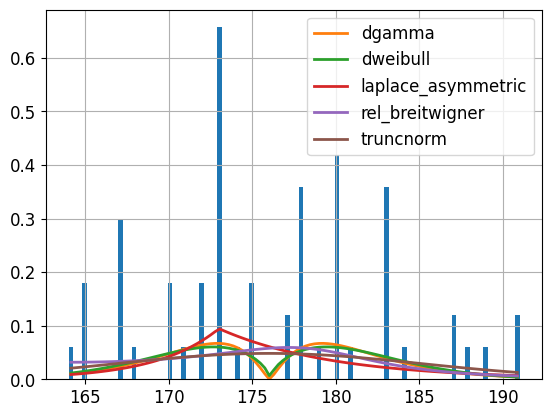

In [ ]:
from fitter import Fitter
f = Fitter(df_rugby)
f.fit()
f.summary()

<Axes: >

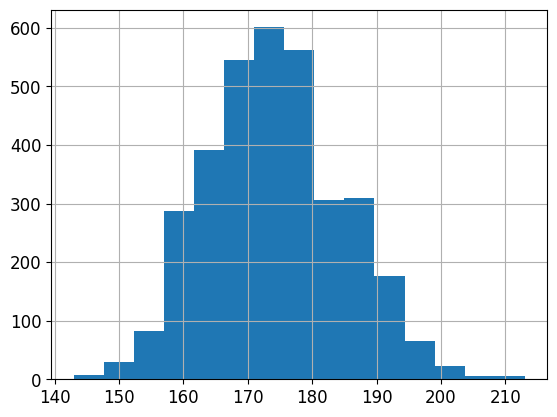

In [ ]:
df_judo.hist(bins=15)

In [ ]:
df_judo.describe()

count    3400.000000
mean      174.187353
std        10.488897
min       143.000000
25%       167.000000
50%       174.000000
75%       181.000000
max       213.000000
Name: Height, dtype: float64

In [ ]:
import scipy
# Shapiro-Wilk Test
stat, p = scipy.stats.shapiro(df_judo) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=0.996, p-value=0.000
Отклонить гипотезу о нормальности, (отклонить H0)


In [ ]:
# D'Agostino and Pearson's Test
stat, p = scipy.stats.normaltest(df_judo) # Критерий согласия Пирсона, Тест д'Агостино на K ^ 2
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=17.788, p-value=0.000
Отклонить гипотезу о нормальности, (отклонить H0)


2024-01-12 08:23:16.629 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-01-12 08:23:22.910 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=0.034908)
2024-01-12 08:23:35.013 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted arcsine distribution with error=0.063895)
2024-01-12 08:23:38.755 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted alpha distribution with error=0.028444)
2024-01-12 08:23:56.401 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=0.028375)
2024-01-12 08:23:59.349 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted argus distribution with error=0.043058)
2024-01-12 08:24:06.261 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted bradford distribution with error=0.046468)
2024-01-12 08:24:27.855 | WARNING  | fitter.fitter:_fit_single_distribution:347 - S

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.028375,1050.014541,1074.540664,inf,0.040268,3.157122e-05
dweibull,0.028376,1028.865858,1047.260450,inf,0.056819,5.547241e-10
powernorm,0.028406,1036.933653,1055.328246,inf,0.044136,3.415363e-06
weibull_min,0.028408,1062.226738,1080.621330,inf,0.041466,1.620514e-05
nakagami,0.028411,1035.919093,1054.313685,inf,0.044601,2.578073e-06


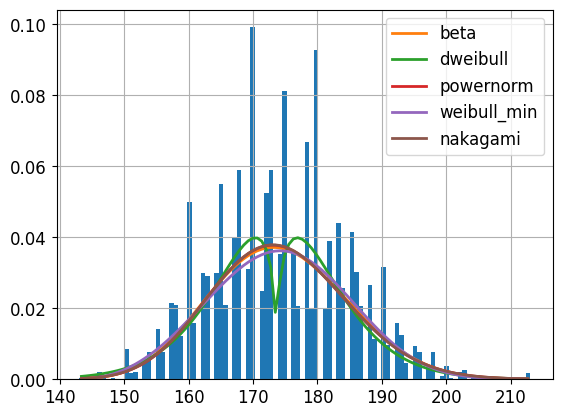

In [ ]:
from fitter import Fitter
f = Fitter(df_judo)
f.fit()
f.summary()

In [ ]:
df_wrest.describe()

count    5346.000000
mean      172.358586
std        10.074425
min       137.000000
25%       165.000000
50%       172.000000
75%       180.000000
max       214.000000
Name: Height, dtype: float64

<Axes: >

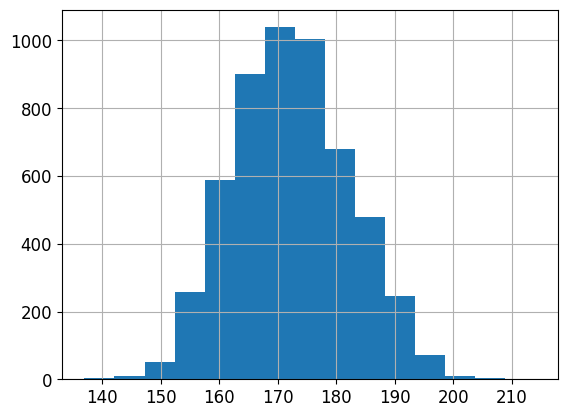

In [ ]:
df_wrest.hist(bins=15)

In [ ]:
import scipy
# Shapiro-Wilk Test
stat, p = scipy.stats.shapiro(df_wrest) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=0.992, p-value=0.000
Отклонить гипотезу о нормальности, (отклонить H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# D'Agostino and Pearson's Test
stat, p = scipy.stats.normaltest(df_wrest) # Критерий согласия Пирсона, Тест д'Агостино на K ^ 2
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=71.688, p-value=0.000
Отклонить гипотезу о нормальности, (отклонить H0)


2024-01-12 08:43:56.424 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-01-12 08:44:08.547 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=0.027589)
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
2024-01-12 08:44:26.496 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED alpha distribution (taking more than 30 seconds)
2024-01-12 08:44:39.357 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED arcsine distribution (taking more than 30 seconds)
2024-01-12 08:44:55.398 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted argus distribution with error=0.035215)
2024-01-12 08:45:10.167 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta d

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
powernorm,0.019564,1163.821048,1183.573360,inf,0.049946,4.977146e-12
chi,0.019634,1160.730227,1180.482539,inf,0.054450,3.235065e-14
nakagami,0.019634,1160.730110,1180.482422,inf,0.054450,3.234650e-14
erlang,0.019649,1145.749360,1165.501672,inf,0.052938,1.841459e-13
gamma,0.019649,1145.749260,1165.501571,inf,0.052938,1.841504e-13


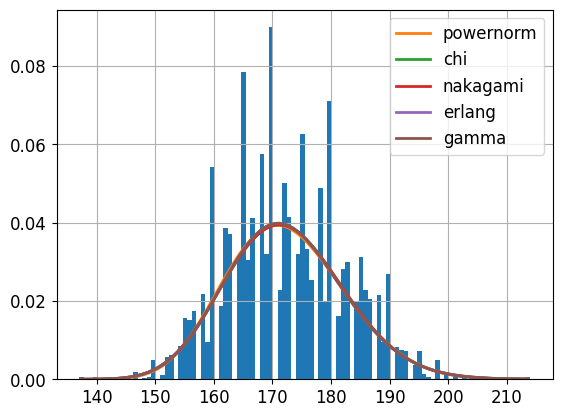

In [ ]:
from fitter import Fitter
f = Fitter(df_wrest)
f.fit()
f.summary()

# t-kriterion

In [ ]:
df_lancet= pd.read_csv('/content/NCD_RisC_Lancet_2020_height_child_adolescent_Russian Federation.csv')
df_lancet

,Country,Sex,Year,Age group,Mean height,Mean height lower 95% uncertainty interval,Mean height upper 95% uncertainty interval,Mean height standard error
0,Russian Federation,Boys,1985,5,109.731818,108.358584,111.103324,0.689660
1,Russian Federation,Boys,1985,6,115.979474,114.714823,117.244200,0.640808
2,Russian Federation,Boys,1985,7,121.666519,120.450258,122.931269,0.628245
3,Russian Federation,Boys,1985,8,126.938283,125.741570,128.183289,0.625653
4,Russian Federation,Boys,1985,9,131.943999,130.747662,133.182474,0.625355
...,...,...,...,...,...,...,...,...
1045,Russian Federation,Girls,2019,15,161.813948,160.283140,163.393593,0.801078
1046,Russian Federation,Girls,2019,16,163.375300,161.875892,164.902104,0.774550
1047,Russian Federation,Girls,2019,17,164.281732,162.800641,165.788875,0.759672
1048,Russian Federation,Girls,2019,18,164.572806,163.048404,166.072312,0.773271


In [ ]:
df_lancet.describe()

,Year,Age group,Mean height,Mean height lower 95% uncertainty interval,Mean height upper 95% uncertainty interval,Mean height standard error
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,2002.000000,12.000000,146.108553,145.069287,147.145524,0.531359
std,10.104318,4.322553,20.421521,20.514886,20.341032,0.254697
min,1985.000000,5.000000,109.098216,108.143251,109.929502,0.255315
25%,1993.000000,8.000000,127.087641,126.052445,128.586771,0.347035
50%,2002.000000,12.000000,150.078566,148.494869,151.054827,0.459675
75%,2011.000000,16.000000,163.563122,162.636781,164.286324,0.628220
max,2019.000000,19.000000,176.830582,176.042383,178.513007,2.025136


In [ ]:
df_lancet_19 = df_lancet[df_lancet['Age group']==19]

In [ ]:
df_lancet_19.describe()

,Year,Age group,Mean height,Mean height lower 95% uncertainty interval,Mean height upper 95% uncertainty interval,Mean height standard error
count,70.000000,70.0,70.000000,70.000000,70.000000,70.000000
mean,2002.000000,19.0,170.184581,169.196626,171.173406,0.505509
std,10.172426,0.0,6.166802,6.052004,6.293015,0.189244
min,1985.000000,19.0,163.235882,162.197932,164.243773,0.267605
25%,1993.250000,19.0,164.181730,163.238695,165.056262,0.354122
50%,2002.000000,19.0,169.742130,168.669222,171.151861,0.452435
75%,2010.750000,19.0,176.327943,175.151464,177.581665,0.639350
max,2019.000000,19.0,176.830582,176.042383,178.513007,0.970537


In [ ]:
stats.ttest_1samp(height_ol_all, 170)

TtestResult(statistic=233.12553008588503, pvalue=0.0, df=210944)

In [ ]:
height_ol_all.describe()

count    210945.000000
mean        175.338970
std          10.518462
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: Height, dtype: float64

In [ ]:
df_lancet_m = df_lancet_19[df_lancet_19['Sex']=='Boys']
df_lancet_m.describe()

,Year,Age group,Mean height,Mean height lower 95% uncertainty interval,Mean height upper 95% uncertainty interval,Mean height standard error
count,35.000000,35.0,35.000000,35.000000,35.000000,35.000000
mean,2002.000000,19.0,176.293300,175.180331,177.398555,0.565500
std,10.246951,0.0,0.482826,0.674431,0.567175,0.201240
min,1985.000000,19.0,174.966888,173.621946,176.273738,0.339968
25%,1993.500000,19.0,176.166216,174.634478,177.115791,0.386243
50%,2002.000000,19.0,176.343921,175.157785,177.582839,0.498178
75%,2010.500000,19.0,176.672164,175.860701,177.719145,0.715590
max,2019.000000,19.0,176.830582,176.042383,178.513007,0.970537


In [ ]:
stats.ttest_1samp(height_ol_all, 176.3)

TtestResult(statistic=-41.96327436418013, pvalue=0.0, df=210944)

In [ ]:
df_olymp_1964 = df_olymp_all[df_olymp_all['Year']>1964]
height_1964 = df_olymp_1964['Height'].dropna()
df_olymp_1964.describe()

,ID,Age,Height,Weight,Year
count,190357.000000,189519.000000,180880.000000,180289.000000,190357.000000
mean,68451.551648,24.958374,175.549160,70.775985,1994.791670
std,39099.504611,5.459420,10.718055,14.667423,14.326217
min,1.000000,11.000000,127.000000,25.000000,1968.000000
25%,34923.000000,21.000000,168.000000,60.000000,1984.000000
50%,68523.000000,24.000000,175.000000,70.000000,1996.000000
75%,102143.000000,28.000000,183.000000,80.000000,2008.000000
max,135571.000000,71.000000,226.000000,214.000000,2016.000000


In [ ]:
stats.ttest_1samp(height_1964, 176.3)

TtestResult(statistic=-29.79386673677007, pvalue=1.39238542244309e-194, df=180879)

In [ ]:
pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 483.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=759f3e6f7c7269767260ba6898817da9a2570a002a819e0d756ebb2a41249cef
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


In [ ]:
height_1964 = pd.DataFrame(height_1964)

In [ ]:
height_1964.describe()

,Height
count,180880.000000
mean,175.549160
std,10.718055
min,127.000000
25%,168.000000
50%,175.000000
75%,183.000000
max,226.000000


In [ ]:
from bioinfokit.analys import stat

res = stat()
res.ztest(df=height_1964, x='Height', mu=176.3, x_std=10.718055, test_type=1)
print(res.summary)


One Sample Z-test 

------------------  -----------------
Sample size         180880
Mean                   175.549
Z value                -29.7939
p value (one-tail)       2.34537e-195
p value (two-tail)       4.69075e-195
Lower 95.0%            175.5
Upper 95.0%            175.599
------------------  -----------------


In [ ]:
from bioinfokit.analys import stat

res = stat()
res.ztest(df=height_1964, x='Height', mu=175.549, x_std=10.718055, test_type=1)
print(res.summary)


One Sample Z-test 

------------------  ---------------
Sample size         180880
Mean                   175.549
Z value                  0.00633557
p value (one-tail)       0.497472
p value (two-tail)       0.994945
Lower 95.0%            175.5
Upper 95.0%            175.599
------------------  ---------------


In [ ]:
wr = pd.DataFrame(df_wrest.values, columns = ['Wrestling'])
ju = pd.DataFrame(df_judo.values, columns = ['Judo'])
df_w=pd.concat([wr, ju])

In [ ]:
ju.std(),wr.std()

(Judo    10.488897
 dtype: float64,
 Wrestling    10.074425
 dtype: float64)

In [ ]:
from bioinfokit.analys import stat

res = stat()
res.ztest(df=df_w, x='Wrestling', y='Judo', x_std=10.074425, y_std=10.488897, test_type=2)
print(res.summary)


Two Sample Z-test 

------------------  --------------
Sample size for x   5346
Sample size for y   3400
Mean of x            172.359
Mean of y            174.187
Z value               -8.07082
p value (one-tail)     3.49126e-16
p value (two-tail)     6.98251e-16
Lower 95.0%           -2.27288
Upper 95.0%           -1.38466
------------------  --------------


In [ ]:
# Import the necessary libraries
import numpy as np
import scipy.stats as stats

# Given information
sample_mean = 176.2933
population_mean = 175.338970
population_std = 10.518462
sample_size = 35
alpha = 0.05

# compute the z-score
z_score = (sample_mean-population_mean)/(population_std/np.sqrt(35))
print('Z-Score :',z_score)

# Approach 1: Using Critical Z-Score

# Critical Z-Score
z_critical = stats.norm.ppf(1-alpha)
print('Critical Z-Score :',z_critical)

# Hypothesis
if z_score > z_critical:
	print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

# Approach 2: Using P-value

# P-Value : Probability of getting less than a Z-score
p_value = 1-stats.norm.cdf(z_score)

print('p-value :',p_value)

# Hypothesis
if p_value < alpha:
	print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")


Z-Score : 0.5367602620426303
Critical Z-Score : 1.6448536269514722
Fail to Reject Null Hypothesis
p-value : 0.2957166119741885
Fail to Reject Null Hypothesis


In [ ]:
df_olymp_bf64 = df_olymp_all[df_olymp_all['Year']<=1964]
height_bf64 = df_olymp_bf64['Height'].dropna()
df_olymp_bf64.describe()

,ID,Age,Height,Weight,Year
count,80759.000000,72123.000000,30065.000000,27952.000000,80759.000000
mean,67771.412511,27.129654,174.074405,70.227730,1939.690957
std,38835.727762,8.158341,9.125512,12.076227,19.527047
min,3.000000,10.000000,137.000000,28.000000,1896.000000
25%,33793.500000,22.000000,168.000000,62.000000,1924.000000
50%,67436.000000,25.000000,174.000000,70.000000,1948.000000
75%,101950.000000,30.000000,180.000000,77.000000,1956.000000
max,135561.000000,97.000000,218.000000,163.000000,1964.000000


In [ ]:
stats.ttest_rel(height_1964.sample(30065), height_bf64)

TtestResult(statistic=17.71305173674385, pvalue=7.536235734148491e-70, df=30064)

In [ ]:
scipy.stats.ttest_ind(df_wrest, df_judo)

TtestResult(statistic=-8.143521576208975, pvalue=4.367489596945011e-16, df=8744.0)

In [ ]:
wr = pd.DataFrame(df_wrest.values, columns = ['Wrestling'])
ju = pd.DataFrame(df_judo.values, columns = ['Judo'])
df_w=pd.concat([wr, ju])

In [ ]:
ju.std(),wr.std()

(Judo    10.488897
 dtype: float64,
 Wrestling    10.074425
 dtype: float64)

In [ ]:
from bioinfokit.analys import stat

res = stat()
res.ztest(df=df_w, x='Wrestling', y='Judo', x_std=10.074425, y_std=10.488897, test_type=2)
print(res.summary)


Two Sample Z-test 

------------------  --------------
Sample size for x   5346
Sample size for y   3400
Mean of x            172.359
Mean of y            174.187
Z value               -8.07082
p value (one-tail)     3.49126e-16
p value (two-tail)     6.98251e-16
Lower 95.0%           -2.27288
Upper 95.0%           -1.38466
------------------  --------------


In [ ]:
import numpy as np
import scipy.stats as stats


# Group A (Offline Classes)
n1 = 5346
x1 = 172.359
s1 = 10.074425

# Group B (Online Classes)
n2 = 3400
x2 = 174.187
s2 = 10.488897

# Null Hypothesis = mu_1-mu_2 = 0
# Hypothesized difference (under the null hypothesis)
D = 0

# Set the significance level
alpha = 0.05

# Calculate the test statistic (z-score)
z_score = ((x1 - x2) - D) / np.sqrt((s1**2 / n1) + (s2**2 / n2))
print('Z-Score:', np.abs(z_score))

# Calculate the critical value
z_critical = stats.norm.ppf(1 - alpha/2)
print('Critical Z-Score:',z_critical)


# Compare the test statistic with the critical value
if np.abs(z_score) > z_critical:
	print("""Reject the null hypothesis.
There is a significant difference between the online and offline classes.""")
else:
	print("""Fail to reject the null hypothesis.
There is not enough evidence to suggest a significant difference between the online and offline classes.""")

# Approach 2: Using P-value

# P-Value : Probability of getting less than a Z-score
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_score)))
print('P-Value :',p_value)

# Compare the p-value with the significance level
if p_value < alpha:
	print("""Reject the null hypothesis.
There is a significant difference between the online and offline classes.""")
else:
	print("""Fail to reject the null hypothesis.
There is not enough evidence to suggest significant difference between the online and offline classes.""")


Z-Score: 8.067438953883187
Critical Z-Score: 1.959963984540054
Reject the null hypothesis.
There is a significant difference between the online and offline classes.
P-Value : 6.661338147750939e-16
Reject the null hypothesis.
There is a significant difference between the online and offline classes.


https://www.geeksforgeeks.org/how-to-perform-a-one-proportion-z-test-in-python/

Z-тест - это статистический тест, который используется для определения того, значительно ли среднее значение выборки отличается от известного среднего значения по совокупности, когда известно стандартное отклонение по совокупности. Это особенно полезно, когда размер выборки большой (> 30).

Z-тест также может быть определен как статистический метод, который используется для определения того, можно ли аппроксимировать распределение статистики теста с использованием нормального распределения или нет. Это метод определения того, являются ли средние значения двух выборок примерно одинаковыми или разными, когда известна их дисперсия и размер выборки большой (должен быть >= 30).

Z-тест сравнивает разницу между средним значением выборки и средним значением совокупности, принимая во внимание стандартное отклонение распределения выборки. Результирующий Z-балл представляет собой количество стандартных отклонений, при которых выборочное среднее отклоняется от среднего по совокупности. Этот Z-показатель также известен как Z-статистика и может быть сформулирован как:

${Z-Оценка} = \frac{\bar{x}-\mu} {\sigma}$

где,

$\ {x}$ : среднее значение выборки.
$\mu$ : среднее значение для популяции.
$\sigma$ : Стандартное отклонение генеральной совокупности.
z-test assumes that the test statistic (z-score) follows a standard normal distribution.
Пример:
Средний годовой доход семьи в Индии составляет 200 тысяч со стандартным отклонением в 5 тысяч, а средний годовой доход семьи в Дели составляет 300 тысяч.

Тогда Z-балл для Дели будет равен.

$\text{Z-оценка}&=\frac{\bar{x}-\ mu} {\sigma} \\&=\frac{300-200}{5} \\&=20$

Это указывает на то, что годовой доход средней семьи в Дели на 20 стандартных отклонений выше среднего по населению (Индия).

Когда использовать Z-тест:
Размер выборки должен быть больше 30. В противном случае нам следует использовать t-тест.
Выборки следует отбирать случайным образом из генеральной совокупности.
Стандартное отклонение генеральной совокупности должно быть известно.
Выборки, взятые из генеральной совокупности, должны быть независимыми друг от друга.
Данные должны быть нормально распределены, однако для большого размера выборки предполагается, что они имеют нормальное распределение, поскольку центральная предельная теорема
Проверка гипотез
Гипотеза - это обоснованное предположение / утверждение об определенном свойстве объекта. Проверка гипотезы - это способ подтвердить утверждение эксперимента.

Нулевая гипотеза: Нулевая гипотеза - это утверждение о том, что значение параметра совокупности (такого как доля, среднее значение или стандартное отклонение) равно некоторому заявленному значению. Мы либо отвергаем, либо не можем отвергнуть нулевую гипотезу. Нулевая гипотеза обозначается H0.
Альтернативная гипотеза: Альтернативная гипотеза - это утверждение о том, что параметр имеет значение, отличное от заявленного значения. Он обозначается через HA.
Уровень значимости: Это означает степень значимости, при которой мы принимаем или отклоняем нулевую гипотезу. Поскольку в большинстве экспериментов невозможно принять или отклонить гипотезу со 100% точностью, мы, следовательно, выбираем уровень значимости. Он обозначается буквой alpha (∝).

Шаги по выполнению Z-теста:
Сначала определите нулевую и альтернативные гипотезы.
Определите уровень значимости (∝).
Найдите критическое значение z в z-тесте, используя
Рассчитайте статистику z-теста. Ниже приведена формула для расчета статистики z-теста.
$Z = \frac{(\overline{X}- \mu)}{\left ( \sigma /\sqrt{n} \right )} $
где,
\строка {x} : среднее значение выборки.
\mu : среднее значение для популяции.
\sigma : Стандартное отклонение генеральной совокупности.
n: размер выборки.
Теперь сравните с гипотезой и решите, отклонять или не отклонять нулевую гипотезу
Тип Z-теста
Тест с левым хвостом: В этом тесте наша область отклонения расположена в крайнем левом углу дистрибутива. Здесь наша нулевая гипотеза заключается в том, что заявленное значение меньше или равно среднему значению популяции.


Правосторонний тест: В этом тесте наша область отклонения расположена в крайней правой части дистрибутива. Здесь наша нулевая гипотеза заключается в том, что заявленное значение меньше или равно среднему значению популяции.


Двусторонний тест: В этом тесте наша область отклонения расположена в обоих крайних точках распределения. Здесь наша нулевая гипотеза заключается в том, что заявленное значение равно среднему значению популяции.


Ниже приведен пример выполнения z-теста:

Пример однохвостого теста:
Школа заявила, что учащиеся, которые изучают это, более умны, чем в средней школе. При расчете показателей IQ 50 учащихся среднее значение оказывается равным 110. Среднее значение IQ населения равно 100, а стандартное отклонение равно 15. Укажите, верно ли утверждение принципала или нет, на уровне значимости 5%.

Сначала мы определяем нулевую гипотезу и альтернативную гипотезу. Наша нулевая гипотеза будет:
H_0 : $\mu = 100$
и наша альтернативная гипотеза.
H_A : $\mu > 100$
Укажите уровень значимости. Здесь в этом вопросе указан наш уровень значимости ($\альфа = 0,05$), если не указан, то мы принимаем ∝= 0,05 в целом.
Теперь мы вычисляем Z-оценку:
X = 110
Среднее значение = 100
Стандартное отклонение = 15
Количество выборок = 50
$\begin{выровнено} \text{Z-оценка}&=\frac{\bar{x}-\mu} {\sigma/\sqrt{n}} \\&=\frac{110-100}{15/\sqrt{50}} \\&=\frac{10}{2.12} \\&=4.71 \ конец {выровнен}$
Теперь обратимся к z-таблице. При значении ∝ = 0.05 z-балл для теста с правым хвостом равен 1.645.
Здесь 4.71 > 1.645, поэтому мы отвергаем нулевую гипотезу.
Если статистика z-теста меньше z-балла, то мы не будем отвергать нулевую гипотезу.

kstest implements the Kolmogorov-Smirnov test. Requires two inputs, the data to use in the test and the
distribution, which can be a string or a frozen random variable object. If the distribution is provided as
a string, then any required shape parameters are passed in the third argument using a tuple containing
these parameters, in order

In [ ]:
stats.kstest(height_ol_all, 'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=127.0, statistic_sign=-1)

ks_2samp implements a 2-sample version of the Kolmogorov-Smirnov test. It is called ks_2samp(x,y)
where both inputs are 1-dimensonal arrays, and returns the test statistic and p-value for the null that
the distribution of x is the same as that of y .

In [ ]:
stats.ks_2samp(df_wrest, df_judo)

KstestResult(statistic=0.0835900398318699, pvalue=4.400596850324585e-13, statistic_location=172.0, statistic_sign=1)

In [ ]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(df_wrest.sample(3400), df_judo)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=2346666.500, p=0.000
Different distribution (reject H0)


In [ ]:
# Kruskal-Wallis H-test
from scipy.stats import kruskal


# compare samples
stat, p = kruskal(df_wrest, df_judo)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=65.024, p=0.000
Different distributions (reject H0)


In [ ]:
# Friedman test

from scipy.stats import friedmanchisquare

# compare samples
stat, p = friedmanchisquare(df_wrest.sample(62), df_judo.sample(62), df_rugby)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=5.286, p=0.071
Same distributions (fail to reject H0)


In [ ]:
stats.skew(df_judo),stats.skew(df_wrest)

(0.15621202037601067, 0.20708540079215365)

In [ ]:
stats.kurtosis(df_judo),stats.kurtosis(df_wrest)

(-0.16007886595493037, -0.327877965684531)

In [ ]:
df_rugby.info()

<class 'pandas.core.series.Series'>
Int64Index: 62 entries, 8827 to 263156
Series name: Height
Non-Null Count  Dtype  
--------------  -----  
62 non-null     float64
dtypes: float64(1)
memory usage: 992.0 bytes


In [ ]:
stats.pearsonr(df_wrest.sample(3400), df_judo)

PearsonRResult(statistic=0.005946531240586272, pvalue=0.728880619675194)

In [ ]:
stats.spearmanr(df_wrest.sample(3400), df_judo)

SignificanceResult(statistic=0.019820096449699693, pvalue=0.24793124088493232)

In [ ]:
stats.kendalltau(df_wrest.sample(3400), df_judo)

SignificanceResult(statistic=-0.002436999301050584, pvalue=0.8364475492614496)

# UFC

In [ ]:

df_ufc = pd.read_csv('https://raw.githubusercontent.com/vn322/Russian-Sport-University/6c18578b781071f524322145d0a2cc894c28651a/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F%20UFCdata%20-%20preprocessed_data.csv', delimiter = ',')
df_ufc.head()

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,...,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,Red,True,5,0,4,0,9.200000,6.000000,0.200000,0.000000,...,0,0,1,0,0,0,0,1,0,0
1,Red,True,5,0,3,0,14.600000,9.100000,11.800000,7.300000,...,0,0,1,0,0,0,0,0,1,0
2,Red,False,3,0,3,0,15.354839,11.322581,6.741935,4.387097,...,0,0,1,0,0,0,0,1,0,0
3,Blue,False,3,0,4,0,17.000000,14.000000,13.750000,11.000000,...,0,0,0,0,0,1,0,1,0,0
4,Blue,False,3,0,1,0,17.000000,14.500000,2.500000,2.000000,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
df_ufc.describe()

,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,...,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
count,3592.000000,3592.000000,3592.000000,3592.0,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,...,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000,3592.000000
mean,3.196548,0.560412,1.126114,0.0,8.800322,6.158010,8.308673,5.615597,53.926193,19.667738,...,0.027283,0.001392,0.768931,0.000557,0.197383,0.031737,0.003341,0.758352,0.210746,0.027561
std,0.664834,0.790660,1.385555,0.0,7.099821,5.077738,7.518370,5.415420,41.194737,16.027255,...,0.162929,0.037288,0.421575,0.023593,0.398079,0.175324,0.057711,0.428142,0.407895,0.163735
min,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.0,3.666667,2.500000,3.000000,2.000000,23.000000,8.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,0.000000,1.000000,0.0,7.000000,5.000000,6.467611,4.275253,45.422619,15.572727,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,3.000000,1.000000,2.000000,0.0,12.275974,8.500000,11.500000,7.857143,74.723214,27.513889,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,5.000000,6.000000,12.000000,0.0,49.000000,39.000000,87.000000,68.000000,271.000000,130.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import scipy
# Shapiro-Wilk Test
stat, p = scipy.stats.shapiro(df_ufc['B_Height_cms']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=0.987, p-value=0.000
Отклонить гипотезу о нормальности, (отклонить H0)


In [ ]:
# D'Agostino and Pearson's Test
stat, p = scipy.stats.normaltest(df_ufc['B_Height_cms']) # Критерий согласия Пирсона, Тест д'Агостино на K ^ 2
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=9.470, p-value=0.009
Отклонить гипотезу о нормальности, (отклонить H0)


2024-01-12 09:05:21.027 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-01-12 09:05:26.512 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=0.205931)
2024-01-12 09:05:40.198 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted alpha distribution with error=0.195585)
2024-01-12 09:05:40.564 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted arcsine distribution with error=0.251184)
2024-01-12 09:06:06.454 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted argus distribution with error=0.217649)
2024-01-12 09:06:09.293 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=0.195071)
2024-01-12 09:06:32.301 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted bradford distribution with error=0.222796)
2024-01-12 09:06:37.592 | INFO     | fitter.fitter:_fit_single_distribution:337 - F

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
dweibull,0.194866,1016.886533,1035.445927,inf,0.099036,4.038459e-31
weibull_min,0.194919,1059.877495,1078.436889,inf,0.071332,2.443552e-16
skewnorm,0.195046,1036.471011,1055.030404,inf,0.077277,4.199285e-19
powernorm,0.195056,1035.465293,1054.024687,inf,0.077796,2.352432e-19
loggamma,0.195067,1036.112740,1054.672133,inf,0.078484,1.083471e-19


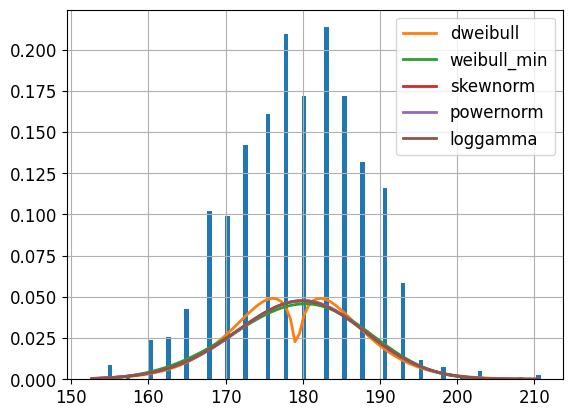

In [ ]:
from fitter import Fitter
f = Fitter(df_ufc['B_Height_cms'])
f.fit()
f.summary()

In [ ]:
ufc_sample = df_ufc['B_Height_cms'].sample(30)

In [ ]:
import scipy
# Shapiro-Wilk Test
stat, p = scipy.stats.shapiro(ufc_sample) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=0.953, p-value=0.205
Принять гипотезу о нормальности, (не отклонять H0)


In [ ]:
# D'Agostino and Pearson's Test
stat, p = scipy.stats.normaltest(ufc_sample) # Критерий согласия Пирсона, Тест д'Агостино на K ^ 2
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=2.463, p-value=0.292
Принять гипотезу о нормальности, (не отклонять H0)


2024-01-12 09:22:17.455 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-01-12 09:22:19.372 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted alpha distribution with error=0.36177)
2024-01-12 09:22:19.581 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=0.370869)
2024-01-12 09:22:22.154 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted argus distribution with error=0.379483)
2024-01-12 09:22:22.741 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted arcsine distribution with error=0.396608)
2024-01-12 09:22:28.299 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=0.360531)
2024-01-12 09:22:28.977 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted betaprime distribution with error=0.361106)
2024-01-12 09:22:31.613 | INFO     | fitter.fitter:_fit_single_distribution:337 - F

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
dgamma,0.334730,965.427762,969.631354,inf,0.221703,8.925998e-02
gennorm,0.335558,1064.736366,1068.939958,inf,0.280220,1.414589e-02
genhyperbolic,0.344893,911.759266,918.765253,inf,0.535701,1.417975e-08
dweibull,0.347704,882.090996,886.294588,inf,0.166667,3.371006e-01
laplace_asymmetric,0.349606,900.460428,904.664020,inf,0.103932,8.692266e-01


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


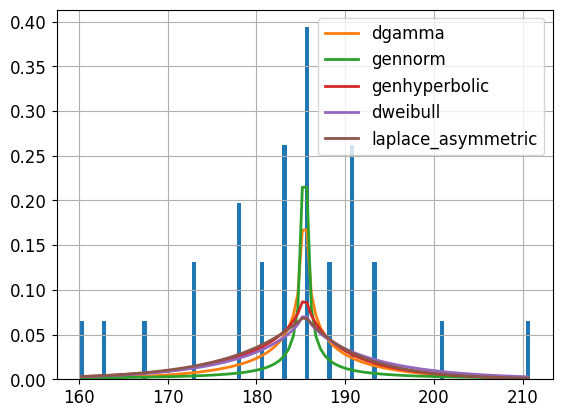

In [ ]:
f = Fitter(ufc_sample)
f.fit()
f.summary()

In [ ]:
import scipy
# Shapiro-Wilk Test
stat, p = scipy.stats.shapiro(df_ufc['B_avg_CLINCH_att']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=0.825, p-value=0.000
Отклонить гипотезу о нормальности, (отклонить H0)


In [ ]:
# D'Agostino and Pearson's Test
stat, p = scipy.stats.normaltest(df_ufc['B_avg_CLINCH_att']) # Критерий согласия Пирсона, Тест д'Агостино на K ^ 2
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности, (не отклонять H0)')
else:
    print('Отклонить гипотезу о нормальности, (отклонить H0)')

Statistics=1966.959, p-value=0.000
Отклонить гипотезу о нормальности, (отклонить H0)


In [ ]:
f = Fitter(df_ufc['B_avg_CLINCH_att'])
f.fit()
f.summary()

2024-01-12 09:30:20.064 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-01-12 09:30:28.511 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=0.042702)
2024-01-12 09:30:40.639 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted alpha distribution with error=0.00321)
2024-01-12 09:30:43.182 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted arcsine distribution with error=0.038374)
2024-01-12 09:30:55.451 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted argus distribution with error=0.054702)


KeyboardInterrupt: 

In [ ]:
f = Fitter(df_ufc['B_avg_BODY_landed'], distributions=['gamma', 'rayleigh', 'uniform'])
f.fit()
f.summary()

In [ ]:
lol = pd.read_csv('/content/2022_LoL_esports_match_data_from_OraclesElixir_20221124.csv')
lol.info()

In [ ]:
f = Fitter(d)
f.fit()
f.summary()